In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import hypergeom
import obonet as obo

In [2]:
output_dir='/cellar/users/snwright/Data/RareCommon/outputs'
fig_dir='/cellar/users/snwright/Data/Transfer/RVC/figures'

In [7]:
df = pd.read_csv(os.path.join(output_dir, 'pilot_netcoloc_within_v0.1.txt'), sep='\t', header=None)
df.columns=['TraitR', 'TraitC', 'Network','Mean_NPS', 'Null_mean_NPS', 'P_mean_NPS', 'Size', 'Null_Size', 'P_size' ]

299/350 traits successful - assume other were filtered out due to too few genes in network. Though two were successful but have NAN for NPS pvalue
(EFO_0004502, EFO_0005110)

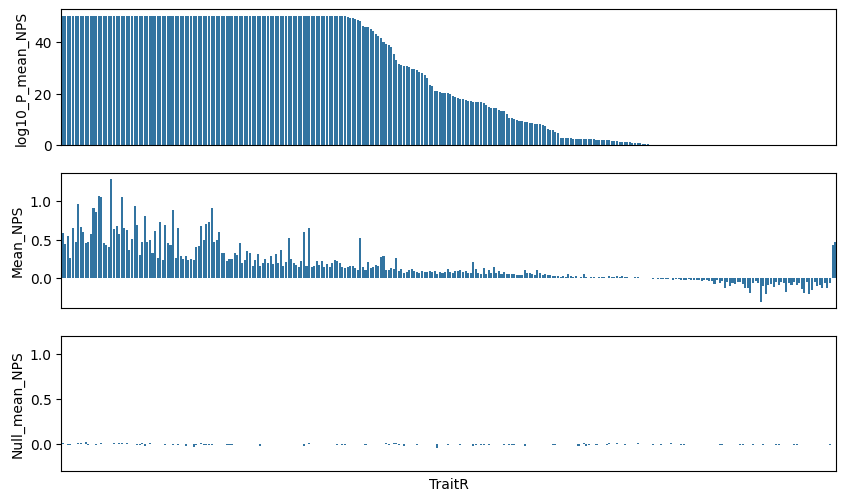

In [9]:
_, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(10, 6), sharey=False, sharex=True)
df = df.sort_values(by='P_mean_NPS')
order = df['TraitR'].values
df['log10_P_mean_NPS'] = -np.log10(df['P_mean_NPS']+1e-50)
sns.barplot(data=df, y='log10_P_mean_NPS', x='TraitR', ax=ax1)
sns.barplot(data=df, y='Mean_NPS', x='TraitR', ax=ax2)
sns.barplot(data=df, y='Null_mean_NPS', x='TraitR', ax=ax3)
ax3.set_ylim(-0.3, 1.2)
_ = plt.xticks([])

Combine with overlap results

In [11]:
overlap_df = pd.read_csv(os.path.join(output_dir, 'overlap_results.defaults_9k.txt'), sep='\t', header=None)
overlap_df.columns = ['trait_pair', 'param_set', 'n_common', 'n_rare', 'n_overlap', 'background', 'pval']
overlap_df['log10_pval'] = -np.log10(overlap_df['pval']+1e-50)
overlap_df['TraitR'] = overlap_df['trait_pair'].str.split('_').str[0] + '_' + overlap_df['trait_pair'].str.split('_').str[1]

In [12]:
overlap_traits = [f'{x}_{x}' for x in order]

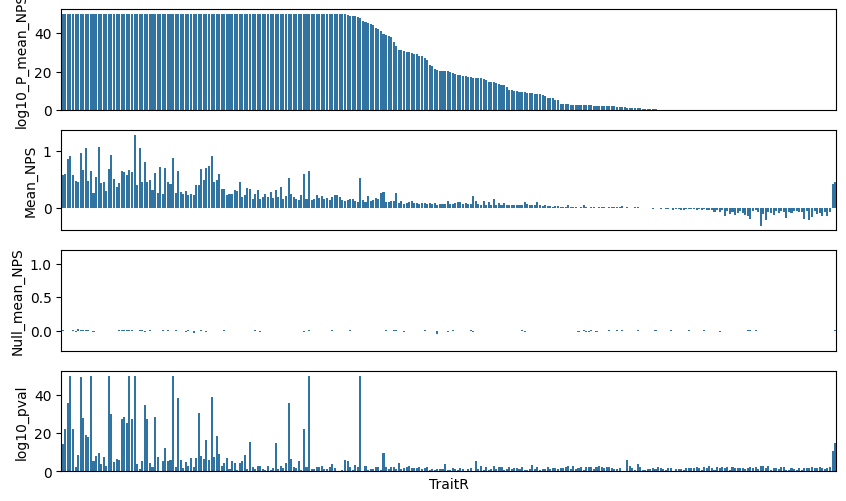

In [14]:
_, [ax1, ax2, ax3, ax4] = plt.subplots(4, 1, figsize=(10, 6), sharey=False, sharex=True)
df = df.sort_values(by='P_mean_NPS')
order = df['TraitR'].values
df['log10_P_mean_NPS'] = -np.log10(df['P_mean_NPS']+1e-50)
sns.barplot(data=df, y='log10_P_mean_NPS', x='TraitR', ax=ax1)
sns.barplot(data=df, y='Mean_NPS', x='TraitR', ax=ax2)
sns.barplot(data=df, y='Null_mean_NPS', x='TraitR', ax=ax3)
sns.barplot(data=overlap_df, x='TraitR', y='log10_pval', ax=ax4, order=order)
ax3.set_ylim(-0.3, 1.2)
_ = plt.xticks([])

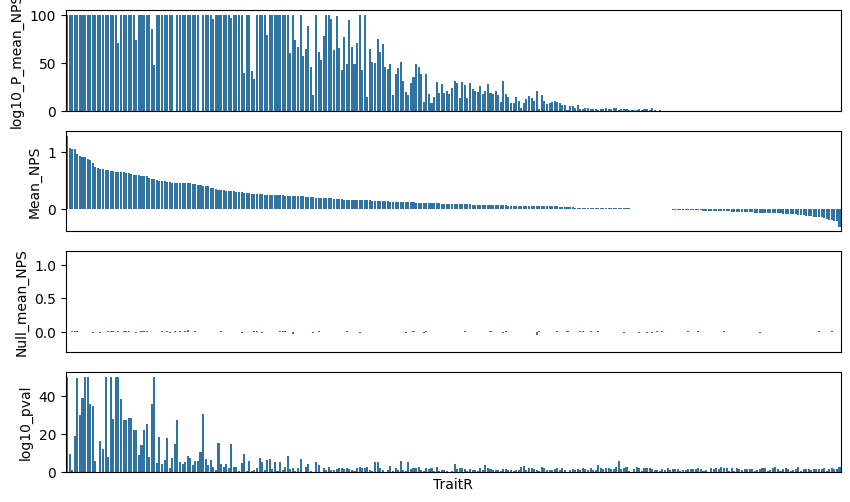

In [15]:
_, [ax1, ax2, ax3, ax4] = plt.subplots(4, 1, figsize=(10, 6), sharey=False, sharex=True)
df = df.sort_values(by='Mean_NPS', ascending=False)
order = df['TraitR'].values
df['log10_P_mean_NPS'] = -np.log10(df['P_mean_NPS']+1e-100)
sns.barplot(data=df, y='log10_P_mean_NPS', x='TraitR', ax=ax1)
sns.barplot(data=df, y='Mean_NPS', x='TraitR', ax=ax2)
sns.barplot(data=df, y='Null_mean_NPS', x='TraitR', ax=ax3)
sns.barplot(data=overlap_df, x='TraitR', y='log10_pval', ax=ax4, order=order)
ax3.set_ylim(-0.3, 1.2)
_ = plt.xticks([])

In [16]:
plot_df = overlap_df.merge(df, on='TraitR')
plot_df['expected'] = plot_df.apply(lambda x: hypergeom.mean(x.background, x.n_common, x.n_rare), axis=1)
plot_df['oe'] = plot_df.n_overlap / plot_df.expected

In [19]:
plot_df.corr(numeric_only=True)

,n_common,n_rare,n_overlap,background,pval,log10_pval,Mean_NPS,Null_mean_NPS,P_mean_NPS,Size,Null_Size,P_size,log10_P_mean_NPS,expected,oe
n_common,1.000000,0.301952,0.508801,NaN,0.140103,0.417563,0.524648,-0.035001,-0.216600,0.567575,0.779709,-0.296849,0.303799,0.537857,-0.079800
n_rare,0.301952,1.000000,0.730063,NaN,0.179853,0.552654,0.397057,0.068613,-0.174199,0.388459,0.481565,-0.189159,0.179531,0.756866,-0.067803
n_overlap,0.508801,0.730063,1.000000,NaN,-0.146892,0.851152,0.608447,0.064685,-0.181802,0.601917,0.607053,-0.217901,0.349779,0.914775,-0.001169
background,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pval,0.140103,0.179853,-0.146892,NaN,1.000000,-0.234894,-0.128691,-0.112139,0.003875,-0.125717,0.120196,-0.013343,-0.175162,0.006072,-0.097138
log10_pval,0.417563,0.552654,0.851152,NaN,-0.234894,1.000000,0.731675,0.121483,-0.219944,0.722575,0.512929,-0.265235,0.489365,0.647060,0.170356
Mean_NPS,0.524648,0.397057,0.608447,NaN,-0.128691,0.731675,1.000000,0.159639,-0.529690,0.950603,0.647420,-0.559283,0.820911,0.443828,0.208686
Null_mean_NPS,-0.035001,0.068613,0.064685,NaN,-0.112139,0.121483,0.159639,1.000000,-0.003547,0.195753,0.038533,-0.056874,0.103213,0.029132,0.173658
P_mean_NPS,-0.216600,-0.174199,-0.181802,NaN,0.003875,-0.219944,-0.529690,-0.003547,1.000000,-0.454726,-0.233741,0.681494,-0.553205,-0.152054,-0.108953
Size,0.567575,0.388459,0.601917,NaN,-0.125717,0.722575,0.950603,0.195753,-0.454726,1.000000,0.703915,-0.563642,0.785170,0.455876,0.292903


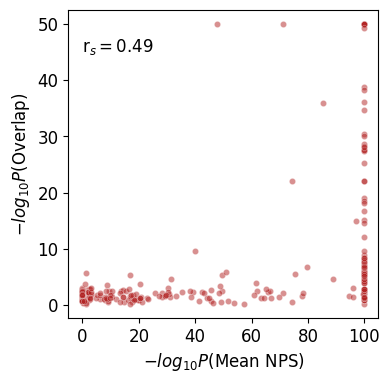

In [20]:
_ = plt.figure(figsize=(4, 4))
sns.scatterplot(data=plot_df, x='log10_P_mean_NPS', y='log10_pval', legend=False, s=20, alpha=0.5, color='firebrick')
plt.annotate('r$_{s}=$0.49', (0, 45), fontsize=12)
plt.xlabel('$-log_{10}P$(Mean NPS)', fontsize=12)
plt.ylabel('$-log_{10}P$(Overlap)', fontsize=12)
plt.gca().tick_params(labelsize=12)
plt.savefig(os.path.join(fig_dir, 'overlap_vs_nps_scatter_v2.png'), bbox_inches='tight', dpi=500)

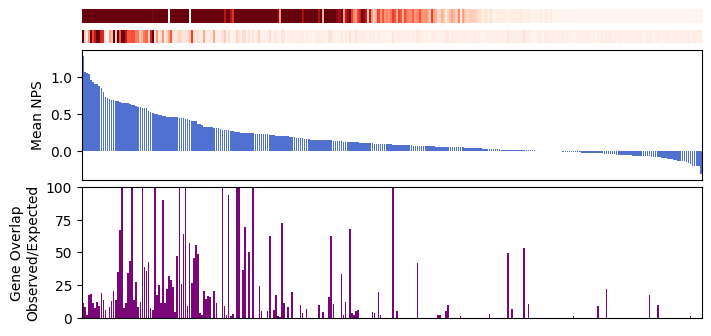

In [21]:
_, [ax1, ax4, ax2, ax3] = plt.subplots(4, 1, figsize=(8, 4), sharey=False, sharex=False, gridspec_kw={'height_ratios': [1,1, 10, 10], 'hspace':0.1})
plot_df = plot_df.sort_values(by='Mean_NPS', ascending=False)
order = plot_df['TraitR'].values
#sns.barplot(data=df, y='log10_P_mean_NPS', x='TraitR', ax=ax1)
sns.heatmap(np.array(plot_df.set_index('TraitR').loc[order]['log10_pval']).reshape(-1, 1).T, ax=ax4, cbar=False, cmap='Reds', yticklabels=False, xticklabels=False, vmax=50, vmin=0)
sns.heatmap(np.array(plot_df.set_index('TraitR').loc[order]['log10_P_mean_NPS']).reshape(-1, 1).T, ax=ax1, cbar=False, cmap='Reds', yticklabels=False, xticklabels=False, vmax=50, vmin=0)
sns.barplot(data=plot_df, y='Mean_NPS', x='TraitR', ax=ax2, color='royalblue', saturation=0.8)
sns.barplot(data=plot_df, x='TraitR', y='oe', ax=ax3, order=order, color='purple', saturation=0.9)
ax3.set_ylim(0, 100)
for ax in [ax1, ax2, ax3]:
    _ = ax.set_xticks([])
    ax.set_xlabel('')
ax2.set_ylabel('Mean NPS', fontsize=10)
ax3.set_ylabel('Gene Overlap\nObserved/Expected', fontsize=10)
plt.savefig(os.path.join(fig_dir, 'overlap_vs_nps_heatmap_v2.png'), bbox_inches='tight', dpi=500)

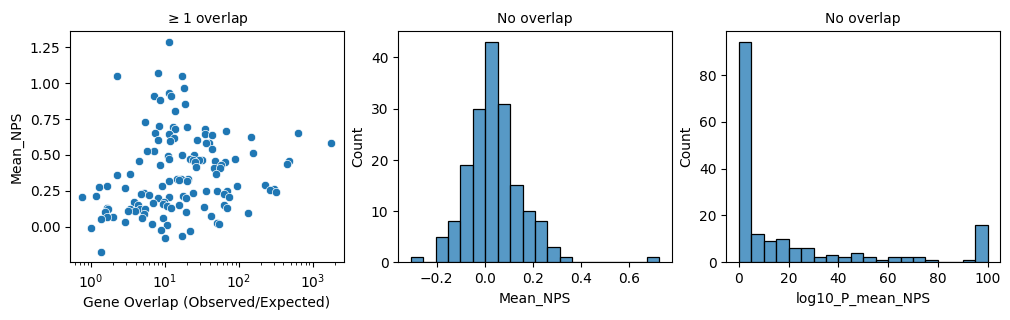

In [93]:
_, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(12, 3))
plot_df['log_oe'] = np.log10(plot_df['oe'] + 1e-1)
sns.scatterplot(plot_df[plot_df['oe'] > 0], x ='oe', y='Mean_NPS', ax=ax1)
ax1.set_xscale('log')
_ = ax1.set_xlabel('Gene Overlap (Observed/Expected)', fontsize=10)
ax1.set_title('$\geq 1$ overlap', fontsize=10)

sns.histplot(plot_df[plot_df['oe']==0].Mean_NPS, bins=20, ax=ax2, zorder=10)
ax2.set_title('No overlap', fontsize=10)
ax3.set_title('No overlap', fontsize=10)
#sns.histplot(plot_df[plot_df['oe']>0].Mean_NPS, bins=20, ax=ax2, zorder=5)
sns.histplot(plot_df[plot_df['oe']==0].log10_P_mean_NPS, bins=20, ax=ax3, zorder=10)
plt.savefig(os.path.join(fig_dir, 'overlap_vs_nps.png'), dpi=400, bbox_inches='tight')

## Specific Examples

In [67]:
no_overlap_high_nps = plot_df[(plot_df['oe']==0)].sort_values(by='Mean_NPS', ascending=False).TraitR[0:10].values
no_overlap_low_nps = plot_df[(plot_df['oe']==0)].sort_values(by='Mean_NPS', ascending=True).TraitR[0:10].values

In [85]:
highest_overlap = plot_df.sort_values(by='pval', ascending=True).TraitR[0:10].values

In [78]:
highest_nps = plot_df.sort_values(by='P_mean_NPS').TraitR[0:10].values

In [80]:
efo = obo.read_obo('http://www.ebi.ac.uk/efo/efo.obo')

In [92]:
print('\n'.join([efo.nodes[x.replace('_', ':')]['name'] for x in no_overlap_high_nps]))

autism spectrum disorder
eye disease
septic shock
waist circumference
Hepatic fibrosis
gastroesophageal reflux disease
base metabolic rate measurement
allergic rhinitis
Myopia
2-hydroxy-3-methylvalerate measurement


In [91]:
print('\n'.join([efo.nodes[x.replace('_', ':')]['name'] for x in no_overlap_low_nps]))

calcaneal bone quantitative ultrasound measurement
Sjogren syndrome
osteoarthritis, hip
diffuse idiopathic skeletal hyperostosis
myositis
Mitral valve prolapse
hepatitis B virus infection
urticaria
upper respiratory tract disorder
rectum cancer


In [89]:
print('\n'.join([efo.nodes[x.replace('_', ':')]['name'] for x in highest_overlap]))

factor VIII measurement
glycine measurement
HbA1c measurement
bilirubin measurement
urate measurement
cystatin C measurement
HDL cholesterol change measurement
total blood protein measurement
phospholipids:total lipids ratio
mean platelet volume


In [90]:
print('\n'.join([efo.nodes[x.replace('_', ':')]['name'] for x in highest_nps]))

total blood protein measurement
intermediate density lipoprotein measurement
lipoprotein A measurement
myocardial infarction
phospholipid measurement
left ventricular mass
Insulinogenic index measurement
free cholesterol measurement
very low density lipoprotein particle size measurement
vitamin D measurement


## Development

In [62]:
# Sjorgen syndrome, calcaneal bone quantitative ultrasound measurement
plot_df[(plot_df['oe']==0)].sort_values(by='Mean_NPS').head(10)

,trait_pair,param_set,n_common,n_rare,n_overlap,background,pval,log10_pval,TraitR,TraitC,...,Mean_NPS,Null_mean_NPS,P_mean_NPS,Size,Null_Size,P_size,log10_P_mean_NPS,expected,oe,log_oe
177,EFO_0007772_EFO_0007772,defaults_9k,4,5,0,9415,0.002123,2.673067,EFO_0007772,EFO_0007772,...,-0.307751,-0.002219,1.0,122,191.915,1.0000,-0.0,0.002124,0.0,-1.0
34,EFO_0000699_EFO_0000699,defaults_9k,21,9,0,9415,0.019905,1.701047,EFO_0000699,EFO_0000699,...,-0.203386,0.002172,1.0,119,219.684,1.0000,-0.0,0.020074,0.0,-1.0
242,EFO_1000786_EFO_1000786,defaults_9k,45,5,0,9415,0.023676,1.625698,EFO_1000786,EFO_1000786,...,-0.198202,-0.001927,1.0,161,268.260,1.0000,-0.0,0.023898,0.0,-1.0
174,EFO_0007236_EFO_0007236,defaults_9k,5,7,0,9415,0.003713,2.430306,EFO_0007236,EFO_0007236,...,-0.194394,0.005089,1.0,95,193.437,1.0000,-0.0,0.003717,0.0,-1.0
42,EFO_0000783_EFO_0000783,defaults_9k,9,10,0,9415,0.009523,2.021238,EFO_0000783,EFO_0000783,...,-0.191995,0.002408,1.0,114,215.016,1.0000,-0.0,0.009559,0.0,-1.0
266,HP_0001634_HP_0001634,defaults_9k,14,3,0,9415,0.004455,2.351171,HP_0001634,HP_0001634,...,-0.155489,-0.002010,1.0,138,176.457,0.9991,-0.0,0.004461,0.0,-1.0
81,EFO_0004197_EFO_0004197,defaults_9k,17,7,0,9415,0.012575,1.900488,EFO_0004197,EFO_0004197,...,-0.140600,-0.000341,1.0,112,177.141,1.0000,-0.0,0.012639,0.0,-1.0
155,EFO_0005531_EFO_0005531,defaults_9k,5,37,0,9415,0.019500,1.709971,EFO_0005531,EFO_0005531,...,-0.129132,0.005399,1.0,194,263.108,1.0000,-0.0,0.019649,0.0,-1.0
282,MONDO_0004867_MONDO_0004867,defaults_9k,15,6,0,9415,0.009524,2.021192,MONDO_0004867,MONDO_0004867,...,-0.128752,0.002255,1.0,231,295.576,1.0000,-0.0,0.009559,0.0,-1.0
240,EFO_1000657_EFO_1000657,defaults_9k,11,24,0,9415,0.027700,1.557517,EFO_1000657,EFO_1000657,...,-0.128440,-0.001413,1.0,117,196.971,1.0000,-0.0,0.028040,0.0,-1.0


In [25]:
plot_df.corr(numeric_only=True, method='spearman')

,n_common,n_rare,n_overlap,background,pval,log10_pval,Mean_NPS,Null_mean_NPS,P_mean_NPS,Size,Null_Size,P_size,log10_P_mean_NPS,expected,oe
n_common,1.000000,0.308786,0.619919,NaN,-0.067626,0.067693,0.496214,-0.059975,-0.372128,0.607194,0.709707,-0.462070,0.382931,0.873783,0.439238
n_rare,0.308786,1.000000,0.388680,NaN,0.087470,-0.087227,0.237645,0.068940,-0.131374,0.278007,0.395790,-0.200846,0.126431,0.717187,0.158259
n_overlap,0.619919,0.388680,1.000000,NaN,-0.696825,0.696883,0.719654,0.124597,-0.635969,0.777860,0.572492,-0.726479,0.627374,0.632185,0.909119
background,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pval,-0.067626,0.087470,-0.696825,NaN,1.000000,-0.999999,-0.520762,-0.124140,0.517416,-0.488826,-0.155703,0.559092,-0.505371,0.016930,-0.713494
log10_pval,0.067693,-0.087227,0.696883,NaN,-0.999999,1.000000,0.520764,0.124000,-0.517399,0.488837,0.155749,-0.559093,0.505358,-0.016769,0.713455
Mean_NPS,0.496214,0.237645,0.719654,NaN,-0.520762,0.520764,1.000000,0.132197,-0.972517,0.904671,0.500000,-0.921156,0.969600,0.475275,0.664981
Null_mean_NPS,-0.059975,0.068940,0.124597,NaN,-0.124140,0.124000,0.132197,1.000000,-0.119677,0.126940,0.000565,-0.145698,0.100716,0.000216,0.158326
P_mean_NPS,-0.372128,-0.131374,-0.635969,NaN,0.517416,-0.517399,-0.972517,-0.119677,1.000000,-0.858408,-0.377955,0.906807,-0.992358,-0.334350,-0.645769
Size,0.607194,0.278007,0.777860,NaN,-0.488826,0.488837,0.904671,0.126940,-0.858408,1.000000,0.654782,-0.947182,0.851392,0.579264,0.726954


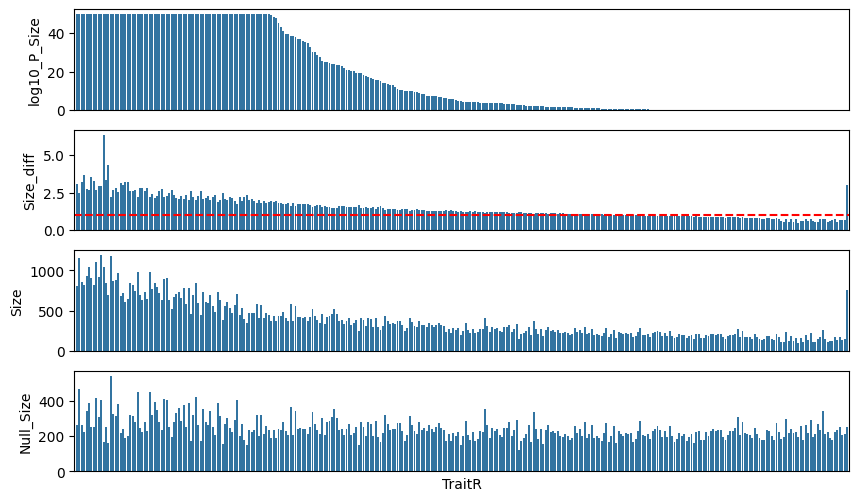

In [24]:
_, [ax1, ax4, ax2, ax3] = plt.subplots(4, 1, figsize=(10, 6), sharey=False, sharex=True)
df = df.sort_values(by='P_size')
df['log10_P_Size'] = -np.log10(df['P_size']+1e-50)
df['Size_diff'] = df['Size'] / df['Null_Size']
sns.barplot(data=df, y='log10_P_Size', x='TraitR', ax=ax1)
sns.barplot(data=df, y='Size', x='TraitR', ax=ax2)
sns.barplot(data=df, y='Null_Size', x='TraitR', ax=ax3)
sns.barplot(data=df, y='Size_diff', x='TraitR', ax=ax4)
ax4.hlines(1, 0, 320, linestyles='dashed', color='red')
plt.xlim(0, 319)
_ = plt.xticks([])

In [6]:
df.describe()

,Mean_NPS,Null_mean_NPS,P_mean_NPS,Size,Null_Size,P_size
count,319.000000,319.000000,3.190000e+02,319.000000,319.000000,3.180000e+02
mean,0.179635,-0.000141,2.191964e-01,376.520376,243.393464,2.718656e-01
std,0.260649,0.006611,3.987119e-01,234.955393,60.828802,4.079615e-01
min,-0.307751,-0.041614,0.000000e+00,95.000000,123.032000,0.000000e+00
25%,0.010443,-0.002113,2.813030e-127,206.000000,203.144500,3.179875e-53
50%,0.099355,0.000104,7.673000e-22,295.000000,231.473000,2.767500e-05
75%,0.272765,0.002505,7.080000e-02,458.000000,266.759500,6.460750e-01
max,1.241124,0.023159,1.000000e+00,1189.000000,542.370000,1.000000e+00
